In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def print_results(df, sample_type, model_name=None):
    if model_name is not None:
        row = (df['Sample Type'] == sample_type) & (df['Model Name'] == model_name)
    else:
        row = df['Sample Type'] == sample_type
    
    mu = df[row]['ACC-true'].mean()
    sigma = df[row]['ACC-true'].std()
    best = df[row]['ACC-true'].max()
    print(f'ACC: {mu:.3f} +- {sigma:.3f}, Best: {best:.3f}')
    # print(f'${mu:.3f}\pm{sigma:.3f}$')

    mu = df[row]['AUC-true'].mean()
    sigma = df[row]['AUC-true'].std()
    best = df[row]['AUC-true'].max()
    print(f'AUC: {mu:.3f} +- {sigma:.3f}, Best: {best:.3f}')
    # print(f'${mu:.3f}\pm{sigma:.3f}$')

# Load file

In [3]:
file_name = './CWoLa_Hunting_Hidden_Valley_training_results.csv'
df = pd.read_csv(file_name)

# Various signal sample size

In [4]:
ACC, std = [], []

sensitivities = range(1,11)

for id, sensitivity in enumerate(sensitivities):
    sample_type = f'Sensitivity: {sensitivity:.1f}'
    model_name = f'SB_{sensitivity:.1f}'
    row = (df['Sample Type'] == sample_type) & (df['Model Name'] == model_name)
    
    ACC.append(df[row]['ACC-true'].mean())
    std.append(df[row]['ACC-true'].std())

row = (df['Sample Type'] == 'Sensitivity: 0.0') & (df['Model Name'] == 'SB_0.0')
no_sig_acc = df[row]['ACC-true'].mean()
no_sig_std = df[row]['ACC-true'].std()

In [5]:
ACC_aug_1, std_aug_1 = [], []

sensitivities_aug_1 = range(1,11)

for id, sensitivity in enumerate(sensitivities_aug_1):
    sample_type = f'Sensitivity: {sensitivity:.1f}, Augmentation: 1'
    model_name = f'SB_{sensitivity:.1f}_aug_1'
    row = (df['Sample Type'] == sample_type) & (df['Model Name'] == model_name)
    
    ACC_aug_1.append(df[row]['ACC-true'].mean())
    std_aug_1.append(df[row]['ACC-true'].std())

row = (df['Sample Type'] == 'Sensitivity: 0.0, Augmentation: 1') & (df['Model Name'] == 'SB_0.0_aug_1')
no_sig_acc_aug_1 = df[row]['ACC-true'].mean()
no_sig_std_aug_1 = df[row]['ACC-true'].std()

In [6]:
ACC_aug_3, std_aug_3 = [], []

sensitivities_aug_3 = range(1,11)

for id, sensitivity in enumerate(sensitivities_aug_3):
    sample_type = f'Sensitivity: {sensitivity:.1f}, Augmentation: 3'
    model_name = f'SB_{sensitivity:.1f}_aug_3'
    row = (df['Sample Type'] == sample_type) & (df['Model Name'] == model_name)
    
    ACC_aug_3.append(df[row]['ACC-true'].mean())
    std_aug_3.append(df[row]['ACC-true'].std())

row = (df['Sample Type'] == 'Sensitivity: 0.0, Augmentation: 1') & (df['Model Name'] == 'SB_0.0_aug_3')
no_sig_acc_aug_3 = df[row]['ACC-true'].mean()
no_sig_std_aug_3 = df[row]['ACC-true'].std()

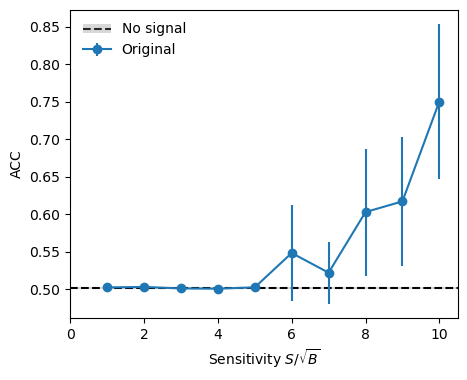

In [7]:
fig, ax = plt.subplots(1,1,figsize=(5, 4))
# plot no signal sample ACC with error bar
ax.axhline(y=no_sig_acc, color='k', linestyle='--', label='No signal sample')
ax.axhspan(no_sig_acc - no_sig_std, no_sig_acc + no_sig_std, facecolor='gray', alpha=0.3, label='Shaded Band')

ax.errorbar(sensitivities, ACC, yerr=std, marker='o', label='Original')


ax.set_xlabel('Sensitivity $S / \sqrt{B}$')
ax.set_ylabel('ACC')

ax.set_xlim(0, 10.5)

handles, labels = ax.get_legend_handles_labels()
handles = [(handles[0],handles[1]), handles[2] ]
labels = ['No signal', labels[2]]
ax.legend(handles, labels, frameon=False, loc='upper left')

# plt.savefig('../figures/HVmodel_CWoLa_CNN.pdf', dpi=300, facecolor='White', bbox_inches='tight')
plt.show()

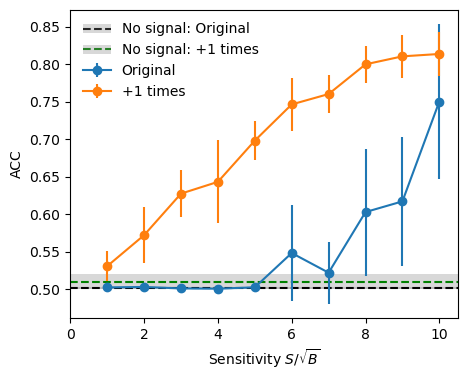

In [8]:
fig, ax = plt.subplots(1,1,figsize=(5, 4))
# plot no signal sample ACC with error bar
ax.axhline(y=no_sig_acc, color='k', linestyle='--', label='No signal sample')
ax.axhspan(no_sig_acc - no_sig_std, no_sig_acc + no_sig_std, facecolor='gray', alpha=0.3, label='Shaded Band')

ax.axhline(y=no_sig_acc_aug_1, color='g', linestyle='--', label='No signal: +1 times')
ax.axhspan(no_sig_acc_aug_1 - no_sig_std_aug_1, no_sig_acc_aug_1 + no_sig_std_aug_1, facecolor='gray', alpha=0.3, label='Shaded Band')

ax.errorbar(sensitivities, ACC, yerr=std, marker='o', label='Original')
ax.errorbar(sensitivities_aug_1, ACC_aug_1, yerr=std_aug_1, marker='o', label='+1 times')


ax.set_xlabel('Sensitivity $S / \sqrt{B}$')
ax.set_ylabel('ACC')

ax.set_xlim(0, 10.5)

handles, labels = ax.get_legend_handles_labels()
handles = [(handles[0],handles[1]), (handles[2],handles[3]), *handles[4:]]
labels = ['No signal: Original', 'No signal: +1 times', *labels[4:]]
ax.legend(handles, labels, frameon=False, loc='upper left')

plt.savefig('../figures/HVmodel_CWoLa_CNN_aug_1.pdf', dpi=300, facecolor='White', bbox_inches='tight')
plt.show()

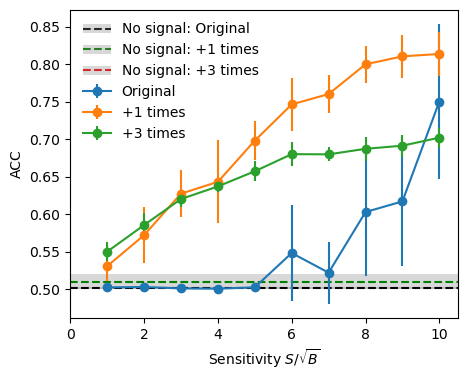

In [9]:
fig, ax = plt.subplots(1,1,figsize=(5, 4))
# plot no signal sample ACC with error bar
ax.axhline(y=no_sig_acc, color='k', linestyle='--', label='No signal sample')
ax.axhspan(no_sig_acc - no_sig_std, no_sig_acc + no_sig_std, facecolor='gray', alpha=0.3, label='Shaded Band')

ax.axhline(y=no_sig_acc_aug_1, color='g', linestyle='--', label='No signal: +1 times')
ax.axhspan(no_sig_acc_aug_1 - no_sig_std_aug_1, no_sig_acc_aug_1 + no_sig_std_aug_1, facecolor='gray', alpha=0.3, label='Shaded Band')

ax.axhline(y=no_sig_acc_aug_3, color='r', linestyle='--', label='No signal: +3 times')
ax.axhspan(no_sig_acc_aug_3 - no_sig_std_aug_3, no_sig_acc_aug_3 + no_sig_std_aug_3, facecolor='gray', alpha=0.3, label='Shaded Band')

ax.errorbar(sensitivities, ACC, yerr=std, marker='o', label='Original')
ax.errorbar(sensitivities_aug_1, ACC_aug_1, yerr=std_aug_1, marker='o', label='+1 times')
ax.errorbar(sensitivities_aug_3, ACC_aug_3, yerr=std_aug_3, marker='o', label='+3 times')

ax.set_xlabel('Sensitivity $S / \sqrt{B}$')
ax.set_ylabel('ACC')

ax.set_xlim(0, 10.5)

handles, labels = ax.get_legend_handles_labels()
handles = [(handles[0],handles[1]), (handles[2],handles[3]), (handles[4],handles[5]), *handles[6:], ]
labels = ['No signal: Original', 'No signal: +1 times', 'No signal: +3 times', *labels[6:]]
ax.legend(handles, labels, frameon=False, loc='upper left')

plt.savefig('../figures/HVmodel_CWoLa_CNN_aug_1_3.pdf', dpi=300, facecolor='White', bbox_inches='tight')
plt.show()

# Box plot

In [10]:
sensitivities = range(11)
ACC = [[]] * len(sensitivities)

for id, sensitivity in enumerate(sensitivities):
    sample_type = f'Sensitivity: {sensitivity:.1f}'
    model_name = f'SB_{sensitivity:.1f}'
    row = (df['Sample Type'] == sample_type) & (df['Model Name'] == model_name)
    
    ACC[id] = df[row]['ACC-true']


ACC_aug_1 = [[]] * len(sensitivities)

for id, sensitivity in enumerate(sensitivities):
    sample_type = f'Sensitivity: {sensitivity:.1f}, Augmentation: 1'
    model_name = f'SB_{sensitivity:.1f}_aug_1'
    row = (df['Sample Type'] == sample_type) & (df['Model Name'] == model_name)
    
    ACC_aug_1[id] = df[row]['ACC-true']

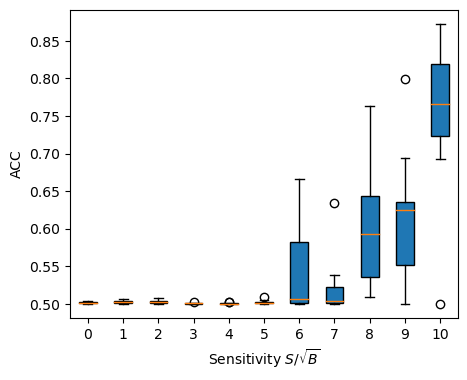

In [11]:
fig, ax = plt.subplots(1,1,figsize=(5, 4))

ax.boxplot(ACC, vert=True, patch_artist=True, labels=sensitivities)
# ax.boxplot(ACC_aug_1, vert=True, patch_artist=True, labels=sensitivities)

# ax.set_xticks(range(1,1+len(sensitivities)), sensitivities)
ax.set_xlabel('Sensitivity $S / \sqrt{B}$')
ax.set_ylabel('ACC')

plt.show()